## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

import re

from langdetect import detect

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from PIL import Image
from numpy import asarray
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_eng = stopwords.words('english')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

import seaborn as sb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tsak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
df = pd.read_csv('tweets_sentiment.csv',sep=',',engine='c')
df

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative
1,3eyedbran,Bran - 3 Eyed Raven,2019-05-27 11:49:06,2019,5,27,0.0,2.0,1.0,Another Test tweet that wasn't caught in the s...,0.0000,Neutral
2,DetroitCrypto,J. Scardina,2019-05-27 11:49:22,2019,5,27,0.0,0.0,0.0,Current Crypto Prices! BTC: $8721.99 USDETH: $...,0.0000,Neutral
3,mmursaleen72,Muhammad Mursaleen,2019-05-27 11:49:23,2019,5,27,0.0,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,0.3612,Weakly Positive
4,evilrobotted,evilrobotted,2019-05-27 11:49:25,2019,5,27,0.0,0.0,0.0,We have been building on the real #bitcoin SV...,-0.4767,Weakly Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,iceXzi,iceXzi,2019-11-23 15:24:08,2019,11,23,17.0,20.0,24.0,$200 #PayPal or #Bitcoin #giveaway 1) RT this ...,0.7378,Strongly Positive
8516870,JacobCanfield,Jacob Canfield,2019-11-23 15:28:50,2019,11,23,2.0,16.0,3.0,Happy #FibonacciDay A while back I created a n...,0.9273,Strongly Positive
8516871,torusJKL,Gal Buki ($torusJKL),2019-11-23 15:45:56,2019,11,23,0.0,0.0,0.0,Register now for the early access of the Codug...,0.0000,Neutral
8516872,Adekunl95628158,Adekunle Daniel,2019-11-23 15:45:57,2019,11,23,0.0,0.0,0.0,Do you know that BTC Baskets isn't a bank bu...,0.8800,Strongly Positive


## 7.4 Add user influence (per tweet)

In [55]:
df_merge = df.merge(df_users_eng[['absolute_user_influence']], on='user', how='inner')
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0


## 7.5 Calculate post influence

In [56]:
df_merge['absolute_post_influence'] = df_merge['replies'] + df_merge['likes'] + df_merge['retweets']
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence,absolute_post_influence
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0,0.0
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0,0.0
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0,2.0
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0,0.0
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0,0.0
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0,0.0
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0,1.0
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0,0.0


## 7.6 Calculate total influence (post and user)

In [57]:
df_merge['influence'] = df_merge[['absolute_user_influence','absolute_post_influence']].mean(axis=1)
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence,absolute_post_influence,influence
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0,0.0,22.5
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0,0.0,22.5
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0,2.0,23.5
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0,0.0,22.5
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0,0.0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0,0.0,0.0
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0,0.0,0.0
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0,1.0,1.0
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0,0.0,0.0


In [58]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
df_merge[['influence']] = min_max_scaler.fit_transform(df_merge[['influence']])
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence,absolute_post_influence,influence
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0,0.0,0.000030
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0,0.0,0.000030
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0,2.0,0.000031
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0,0.0,0.000030
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0,0.0,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0,0.0,0.000000
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0,0.0,0.000000
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0,1.0,0.000001
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0,0.0,0.000000


## 7.7 Weighted polarity

In [59]:
df_merge['weighted_polarity'] = df_merge['polarity'] * df_merge['influence']
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence,absolute_post_influence,influence,weighted_polarity
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0,0.0,0.000030,-0.000003
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0,0.0,0.000030,0.000000
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0,2.0,0.000031,0.000000
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0,0.0,0.000030,0.000000
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0,0.0,0.000030,-0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0,0.0,0.000000,0.000000
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0,0.0,0.000000,0.000000
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0,1.0,0.000001,0.000000
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0,0.0,0.000000,-0.000000


## 7.8 Weighted polarity to sentiment

In [60]:
def polarity_to_sentiment(polarity):
    if polarity == 0:
        return "Neutral"
    elif (polarity > 0) and (polarity < 0.5):
        return "Weakly Positive"
    elif (polarity < 0) and (polarity > -0.5):
        return "Weakly Negative"
    elif (polarity > 0.5):
        return "Strongly Positive"
    elif (polarity < -0.5):
        return "Strongly Negative"

In [61]:
df_merge['weighted_sentiment'] = df_merge['weighted_polarity'].apply(polarity_to_sentiment) 
df_merge

,user,fullname,timestamp,year,month,day,replies,likes,retweets,text,polarity,sentiment,absolute_user_influence,absolute_post_influence,influence,weighted_polarity,weighted_sentiment
0,bitcointe,Bitcointe,2019-05-27 11:49:18,2019,5,27,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS 6500% ROI; ...,-0.1027,Weakly Negative,45.0,0.0,0.000030,-0.000003,Weakly Negative
1,bitcointe,Bitcointe,2019-05-10 10:52:58,2019,5,10,0.0,0.0,0.0,Germany Plans Major Digital Token Regulation E...,0.0000,Neutral,45.0,0.0,0.000030,0.000000,Neutral
2,bitcointe,Bitcointe,2019-05-11 06:01:16,2019,5,11,0.0,1.0,1.0,How to Generate QR Codes for Crypto Payments ...,0.0000,Neutral,45.0,2.0,0.000031,0.000000,Neutral
3,bitcointe,Bitcointe,2019-05-10 12:06:27,2019,5,10,0.0,0.0,0.0,PR: ACD Launches Coin Buy Back Project | Bi...,0.0000,Neutral,45.0,0.0,0.000030,0.000000,Neutral
4,bitcointe,Bitcointe,2019-05-10 13:10:34,2019,5,10,0.0,0.0,0.0,Crypto Heresy: Question Blockstream on Twitter...,-0.2732,Weakly Negative,45.0,0.0,0.000030,-0.000008,Weakly Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516869,DoorStepClothin,DoorStep Clothing,2019-11-23 15:43:47,2019,11,23,0.0,0.0,0.0,#WHUTOT#metrofmtop40#Sundowns#SaturdayThoughts...,0.0000,Neutral,0.0,0.0,0.000000,0.000000,Neutral
8516870,Winivity_,❦,2019-11-23 15:44:03,2019,11,23,0.0,0.0,0.0,drazah and prolute got finessed a bit but i w...,0.6124,Strongly Positive,0.0,0.0,0.000000,0.000000,Neutral
8516871,skynethere,Batuhan...,2019-11-23 15:44:06,2019,11,23,0.0,0.0,1.0,Bitcoin Data Science | Why We're Just Getting...,0.0000,Neutral,1.0,1.0,0.000001,0.000000,Neutral
8516872,xStarDragonsx,🦊🐉MK's Art🐉🦊,2019-11-23 15:45:26,2019,11,23,0.0,0.0,0.0,Lmao he probably thinks he's all that by hav...,-0.6031,Strongly Negative,0.0,0.0,0.000000,-0.000000,Neutral


## 7.9 Total Sentiment (pie)

In [62]:
labels1 = df_merge.sentiment.value_counts().index
raw_sentiment_values = df_merge.sentiment.value_counts()

labels2 = df_merge.weighted_sentiment.value_counts().index
weighted_sentiment_values = df_merge.weighted_sentiment.value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'} , {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=raw_sentiment_values),1, 1)
fig.add_trace(go.Pie(labels=labels2, values=weighted_sentiment_values),1, 2)

fig.update_traces(hole=.4, hoverinfo="label")

fig.update_layout(
    annotations=[dict(text="Raw sentiment", x=0.15, y=0.5, font_size=14, showarrow=False),
                dict(text="Weighted sentiment", x=0.868, y=0.5, font_size=12.5, showarrow=False)])
fig.show()

## 7.10 Grouping per day

In [63]:
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_per_day = df_merge[['polarity','weighted_polarity']].groupby([df_merge['timestamp'].dt.date]).mean()
df_per_day['tweets'] = (df_merge['timestamp'].dt.date).value_counts().sort_index()
df_per_day = df_per_day.reset_index(drop=False)
df_per_day['timestamp'] = pd.to_datetime(df_per_day['timestamp'], format='%Y-%m-%d', errors='coerce')
df_per_day

,timestamp,polarity,weighted_polarity,tweets
0,2013-04-29,0.024262,0.000002,267
1,2013-04-30,0.013473,-0.000070,280
2,2013-05-01,0.017713,-0.000086,260
3,2013-05-02,0.009069,-0.000105,239
4,2013-05-03,0.033047,-0.000101,240
...,...,...,...,...
2395,2019-11-19,0.093899,0.000117,29846
2396,2019-11-20,0.097007,0.000207,28279
2397,2019-11-21,0.084455,0.000069,34008
2398,2019-11-22,0.070291,0.000087,37125


## 7.11.1 Polarity per day

In [124]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
    x=df_per_day.timestamp,
    y=df_per_day.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
),1,1)

fig.add_trace(go.Scatter(
    x=df_per_day.timestamp,
    y=df_per_day.weighted_polarity,
    name = 'Weighted polarity',
    marker=dict(color="red"),
    showlegend=True
),2,1)

fig.update_layout(
    title="Polarity per day",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Polarity",
)

In [65]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_per_day.timestamp,
    y=df_per_day.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_per_day.timestamp,
    y=df_per_day.weighted_polarity,
    name = 'Weighted Polarity',
    marker=dict(color="red"),
    showlegend=True
))

fig.update_layout(
    title="Polarity per day",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Polarity",
)

## 7.11.2 Polarity per month

In [66]:
df_per_month = df_per_day[['timestamp','polarity','weighted_polarity']].resample('M', on='timestamp').mean()
df_per_month['tweets'] = df_per_day[['timestamp','tweets']].resample('M', on='timestamp').sum()

df_per_month = df_per_month.reset_index(drop=False)
df_per_month['timestamp'] = pd.to_datetime(df_per_month['timestamp'], format='%Y-%m-%d', errors='coerce')

df_per_month## Polarity per day

,timestamp,polarity,weighted_polarity,tweets
0,2013-04-30,0.018868,-0.000034,547
1,2013-05-31,0.014904,-0.000090,5467
2,2013-06-30,-0.005582,-0.000065,4056
3,2013-07-31,-0.014661,-0.000082,4685
4,2013-08-31,-0.005238,-0.000026,7932
...,...,...,...,...
75,2019-07-31,0.106540,0.000193,1141019
76,2019-08-31,0.100846,0.000168,938891
77,2019-09-30,0.098047,0.000177,889803
78,2019-10-31,0.099205,0.000160,895654


In [68]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
    x=df_per_month.timestamp,
    y=df_per_month.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
),1,1)

fig.add_trace(go.Scatter(
    x=df_per_month.timestamp,
    y=df_per_month.weighted_polarity,
    name = 'Weighted polarity',
    marker=dict(color="red"),
    showlegend=True
),2,1)

In [69]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_per_month.timestamp,
    y=df_per_month.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_per_month.timestamp,
    y=df_per_month.weighted_polarity,
    name = 'Weighted Polarity',
    marker=dict(color="red"),
    showlegend=True
))

fig.update_layout(
    title="Polarity per month",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Polarity",
)

## 7.11.3 Polarity per year

In [70]:
df_per_year = df_per_month[['timestamp','polarity','weighted_polarity']].resample('Y', on='timestamp').mean()
df_per_year['tweets'] = df_per_month[['timestamp','tweets']].resample('Y', on='timestamp').sum()

df_per_year = df_per_year.reset_index(drop=False)
df_per_year['timestamp'] = pd.to_datetime(df_per_year['timestamp'], format='%Y-%m-%d', errors='coerce')

df_per_year

,timestamp,polarity,weighted_polarity,tweets
0,2013-12-31,0.022671,0.002173,84332
1,2014-12-31,0.126332,0.011311,225805
2,2015-12-31,0.115108,0.010224,154327
3,2016-12-31,0.046829,0.005543,176480
4,2017-12-31,0.039273,0.001131,421052
5,2018-12-31,0.056416,0.000211,718311
6,2019-12-31,0.093097,0.000316,6736567


In [73]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
    x=df_per_year.timestamp,
    y=df_per_year.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
),1,1)

fig.add_trace(go.Scatter(
    x=df_per_year.timestamp,
    y=df_per_year.weighted_polarity,
    name = 'Weighted polarity',
    marker=dict(color="red"),
    showlegend=True
),2,1)

In [74]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_per_year.timestamp,
    y=df_per_year.polarity,
    name = 'Polarity',
    marker=dict(color="blue"),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_per_year.timestamp,
    y=df_per_year### Tweets per month

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_per_month.timestamp,
    y=df_per_month.tweets,
    name = 'Tweets',
    marker=dict(color="blue"),
    showlegend=True
))
fig.update_layout(
    title="Tweets per month",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Tweets",
)
fig.update_yaxes(type='log').weighted_polarity,
    name = 'Weighted Polarity',
    marker=dict(color="red"),
    showlegend=True
))

fig.update_layout(
    title="Polarity per year",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Polarity",
)

## 7.12 Tweets per year

In [86]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_per_year.timestamp,
    y=df_per_year.tweets,
    name = 'Tweets',
    marker=dict(color="blue"),
    showlegend=True
))
fig.update_layout(
    title="Tweets per year",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Tweets",
)
fig.update_yaxes(type='log')

# 8. Importing bitcoin data

In [75]:
df_btc_raw = pd.read_csv('bitcoin.csv',sep=',',engine='c')
df_prices = df_btc_raw[['High','Low','Open','Close','Volume','Marketcap']]
df_prices.index = pd.to_datetime(df_btc_raw['Date'], format='%Y-%m-%d').dt.date
df_prices

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


## 8.1 Keep values between 2013-04-29 and 2019-11-23

In [76]:
enddate = pd.to_datetime("2019-11-23").date()
df_prices = df_prices.loc[:enddate]
df_prices

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...
2019-11-19,8408.516128,8099.963369,8305.134291,8206.145918,2.108361e+10,1.481784e+11
2019-11-20,8237.239874,8010.511901,8203.613180,8027.268243,2.076430e+10,1.449627e+11
2019-11-21,8110.098131,7597.381608,8023.644687,7642.749945,2.251424e+10,1.380319e+11


## 8.2 Outer join the 2 datasets and interpolation of missing sentiment values 

In [80]:
df_per_day.index = pd.to_datetime(df_per_day['timestamp'], errors='coerce', format='%Y-%m-%d').dt.date

df_join = pd.merge(df_prices, df_per_day, left_index=True, right_index=True, how='outer')
df_join = df_join.drop(columns=['timestamp','Volume','Marketcap'])
df_join = df_join.interpolate()
df_join

,High,Low,Open,Close,polarity,weighted_polarity,tweets
Date,,,,,,,
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.024262,0.000002,267
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.013473,-0.000070,280
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.017713,-0.000086,260
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.009069,-0.000105,239
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.033047,-0.000101,240
...,...,...,...,...,...,...,...
2019-11-19,8408.516128,8099.963369,8305.134291,8206.145918,0.093899,0.000117,29846
2019-11-20,8237.239874,8010.511901,8203.613180,8027.268243,0.097007,0.000207,28279
2019-11-21,8110.098131,7597.381608,8023.644687,7642.749945,0.084455,0.000069,34008


In [81]:
df_join.to_csv('all_data_daily.csv',index=True)

# 8.3 Correlation Heatmap

<AxesSubplot:>

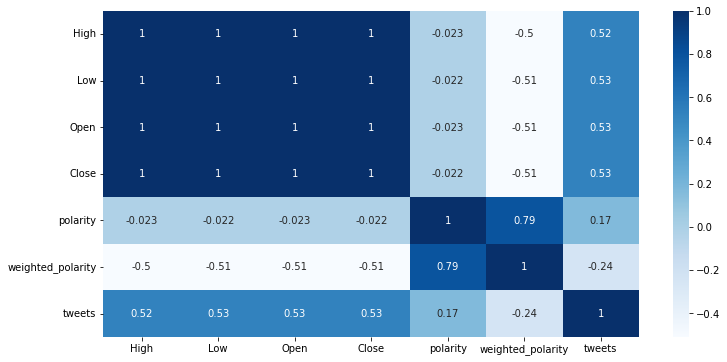

In [82]:
corr = df_join.corr()
plt.figure(figsize=(12,6))
sb.heatmap(corr, cmap="Blues", annot=True)